**Nitheeswaran M 24BAD079**

**#Scenario 1**

In [42]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [43]:
bottle_data= pd.read_csv("/kaggle/input/calcofi/bottle.csv",low_memory=False)
cast_data=pd.read_csv("/kaggle/input/calcofi/cast.csv",low_memory=False)

In [44]:
bottle_data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cast_data.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [46]:
bottle_data.tail()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,...,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
cast_data.tail()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0
34403,34404,2016-11-06-C-33SR,201611,20161109340264,9340264,20-1611SR-MX-310-22:39-09340264,093.4 026.4,4,ST,-1.558,...,8.0,25.0,2.0,1015.4,20.0,17.5,1.0,2.0,2.0,6.0


In [48]:
bottle_data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [49]:
cast_data.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [50]:
cast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [51]:
bottle_data.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [52]:
cast_data.isnull().sum()

Cst_Cnt           0
Cruise_ID         0
Cruise            0
Cruz_Sta          0
DbSta_ID          0
              ...  
Wet_T         15415
Wea            7597
Cloud_Typ     24484
Cloud_Amt     22522
Visibility    24897
Length: 61, dtype: int64

In [53]:
bottle_merged = pd.merge(bottle_data, cast_data, on='Cst_Cnt', how='left')
bottle_merged.head()

,Cst_Cnt,Btl_Cnt,Sta_ID_x,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [54]:
cols = ['T_degC', 'Depthm', 'Salnty', 'O2ml_L', 'Lat_Dec', 'Lon_Dec']
bottle_data_filtered = bottle_merged[cols]
bottle_data_filtered = bottle_data_filtered.fillna(bottle_data_filtered.mean())
bottle_data_filtered.head()

,T_degC,Depthm,Salnty,O2ml_L,Lat_Dec,Lon_Dec
0,10.50,0,33.440,3.392468,38.833333,-124.083333
1,10.46,8,33.440,3.392468,38.833333,-124.083333
2,10.46,10,33.437,3.392468,38.833333,-124.083333
3,10.45,19,33.420,3.392468,38.833333,-124.083333
4,10.45,20,33.421,3.392468,38.833333,-124.083333


In [55]:
X = bottle_data_filtered[['Depthm', 'Salnty', 'O2ml_L', 'Lat_Dec', 'Lon_Dec']]
y = bottle_data_filtered['T_degC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Base Model Performance ---")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

--- Base Model Performance ---
MSE: 5.0513
RMSE: 2.2475
R² Score: 0.7152


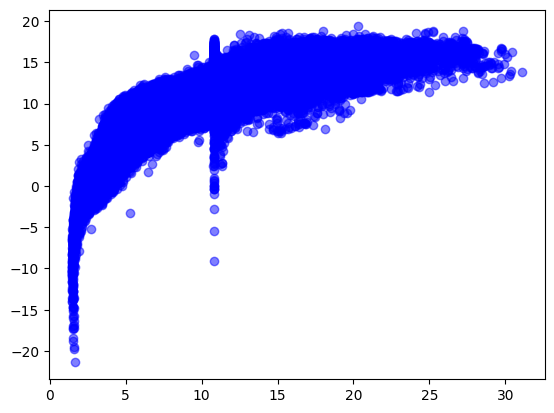

In [58]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

Text(0.5, 1.0, 'Actual vs Predicted Temperature')

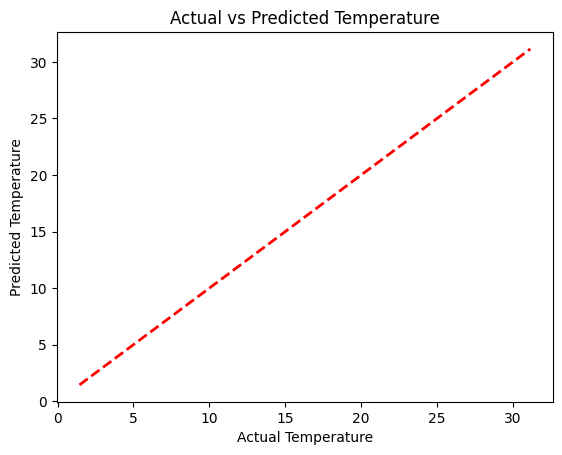

In [59]:
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Identity line
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')

Text(0.5, 1.0, 'Residual Error Distribution')

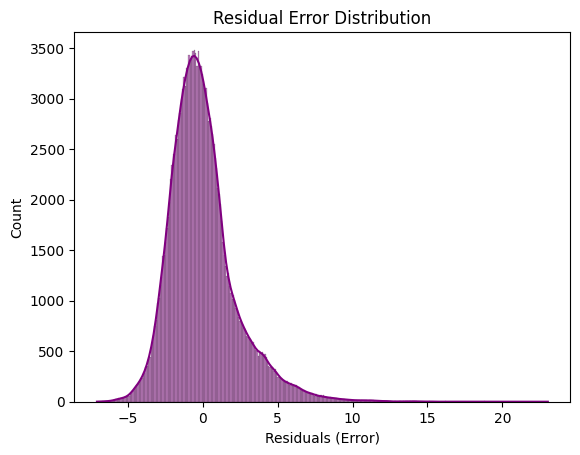

In [60]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals (Error)')
plt.title('Residual Error Distribution')

In [61]:
selector = SelectKBest(score_func=f_regression, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(f"Top 3 Selected Features: {selected_features.tolist()}")

Top 3 Selected Features: ['Depthm', 'Salnty', 'O2ml_L']


In [62]:
#  Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
print(f"Ridge RMSE: {np.sqrt(mean_squared_error(y_test, ridge_pred)):.4f}")

#  Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
print(f"Lasso RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred)):.4f}")

Ridge RMSE: 2.2475
Lasso RMSE: 2.2549


**#Scenario 2**

In [63]:
df=pd.read_csv("/kaggle/input/lic-stock-price-data/LICI - 10 minute data.csv")

In [64]:
df.head()

,date,open,high,low,close,volume
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.0,872.00,3759243
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.0,872.00,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.0,902.80,12449251
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.0,902.15,5237329
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.0,903.85,1820317


In [65]:
df.tail()

,date,open,high,low,close,volume
3679,2022-10-13 14:45:00+05:30,611.50,612.00,611.25,611.85,11190
3680,2022-10-13 14:55:00+05:30,611.75,611.95,611.55,611.85,15446
3681,2022-10-13 15:05:00+05:30,611.60,611.95,611.30,611.40,24264
3682,2022-10-13 15:15:00+05:30,611.60,612.00,611.05,611.60,41148
3683,2022-10-13 15:25:00+05:30,611.60,611.80,611.20,611.50,15685


In [66]:
df.describe()

,open,high,low,close,volume
count,3684.000000,3684.000000,3684.000000,3684.000000,3.684000e+03
mean,694.709718,695.575679,693.738871,694.598588,7.014561e+04
std,63.481439,63.755377,63.166795,63.428558,2.639151e+05
min,611.400000,611.800000,611.000000,611.250000,0.000000e+00
25%,658.275000,659.500000,657.250000,658.125000,1.659125e+04
50%,676.225000,677.000000,675.375000,676.125000,3.025700e+04
75%,699.850000,700.612500,699.000000,699.800000,6.085100e+04
max,903.850000,918.100000,900.000000,903.850000,1.244925e+07


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3684 non-null   object 
 1   open    3684 non-null   float64
 2   high    3684 non-null   float64
 3   low     3684 non-null   float64
 4   close   3684 non-null   float64
 5   volume  3684 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 172.8+ KB


In [68]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [69]:
df['Target'] = (df['close'].shift(-1) > df['close']).astype(int)
df_model = df.drop(['date'], axis=1).dropna()

X = df_model.drop('Target', axis=1)
y = df_model['Target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Train Logistic Regression
model = LogisticRegression(C=100, penalty='l2', solver='liblinear', max_iter=5000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

Accuracy:  0.5889
Precision: 0.8667
Recall:    0.0414
F1-Score:  0.0790


Text(0.5, 1.0, 'Confusion Matrix')

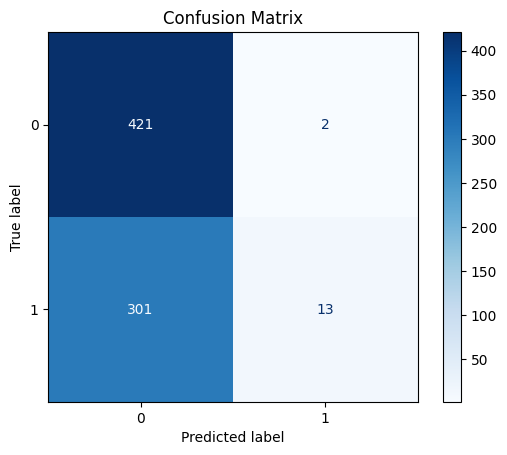

In [77]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Receiver Operating Characteristic')

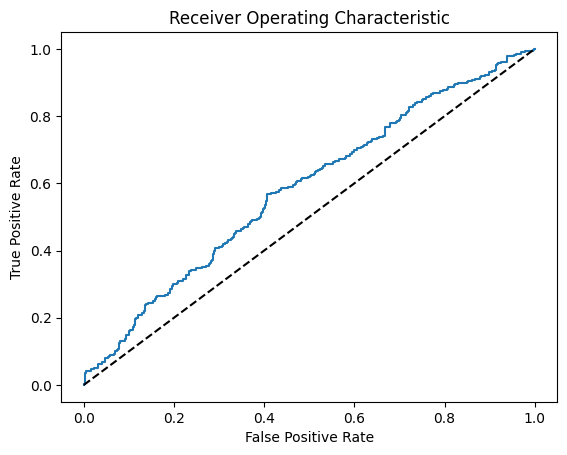

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

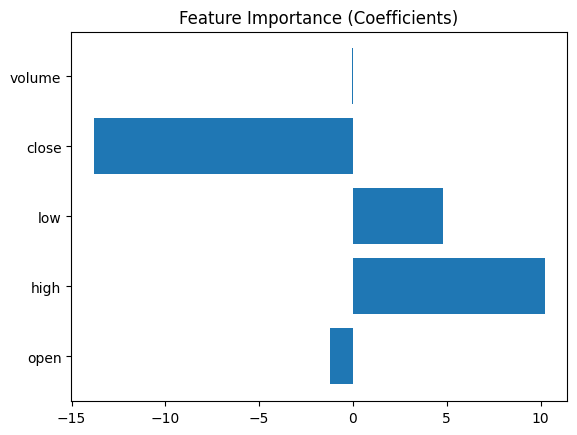

In [79]:
importance = model.coef_[0]
features = X.columns
plt.barh(features, importance)
plt.title("Feature Importance (Coefficients)")
plt.show()

In [81]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] 
}

grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
